# Великий и могучий русский язык в самых прослушиваемых песнях 2022 года

«Слово — одежда всех фактов, всех мыслей» — говорил Максим Горький. Слова продолжают материальный мир и становятся его неотъемлемой частью. Мы решили разобраться, во что мы "одевали" свои мысли в 2022 году — и в качестве выборки для изучения взяли тексты самых прослушиваемых песен по версии Яндекс.Музыки — ведь вслед за кумирами их повторяют тысячи русскоговорящих.

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p

from sklearn.feature_extraction.text import CountVectorizer 

import re
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rizho\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rizho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Загрузка  и обзор данных

In [2]:
data = pd.read_csv('top100_2022.csv')

In [3]:
data.head()

,Unnamed: 0,place,text,artist
0,0,1,"""Я больше не жду не плачу не ревную\nНе запива...",Artik & Asti
1,1,2,"""Ты ночной кошмар что растаял по утру\nЯ по-пр...",ANNA ASTI
2,2,3,"""Не плачь моя милая. Я его не подпущу к тебе\n...",ANNA ASTI feat. Philipp Kirkorov
3,3,4,"""Возвращаться нам больше нет причин\nБольше не...",Kamazz
4,4,5,"""Вместе со старым хламом ненужным\nВ начале пя...",ANNA ASTI


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  88 non-null     int64 
 1   place       88 non-null     int64 
 2   text        88 non-null     object
 3    artist     88 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.9+ KB


В нашем распоряжении совсем небольшой датасет, в который вошли русскоязычные песни из плейлиста "2022: что мы слушали". В нем оставлена информация по 88 песням — 12 из 100 самых прослушиваемых песен не имели слов совсем или их тексты написаны на иностранном языке.

Кроме текста песни имеется также информация о её месте в чарте (признак `place`) и её исполнителе (признак `artist` — если исполнителей несколько они записаны через "feat").

In [5]:
data = data.drop(columns=['Unnamed: 0']) # удаляем дублирующий столбец с индексом строки

### Лемматизация текста

Прежде чем считать слова, их необходимо лемматизировать, т.е. привести к нормальной форме. Для лемматизации текстов воспользуемся библиотекой pymystem3.

In [6]:
lemmatizer = Mystem() # создаем объект класса Mystem

In [7]:
lemmatizer.lemmatize("плачу")  # проверим как работает лемматизатор на случайной слове 
                               # из первой песни в чарте

['плакать', '\n']

In [8]:
def lemmatize_text(text, r_mask = r'[^а-яА-ЯёЁ]'):
    """
    Функция предназначена для лемматизации текста. Перед использованием необходимо импортировать библиотеку pymystem3 и 
    создать объект класса Mystem.
    
    На вход принимает текст text, который сначала приводится к нижнему регистру, затем лемматизируется и очищается
    от знаков препинания и латинский букв посредством регулярного выражения r_mask. При необходимости работы с
    англоязычным текстом значение регулярного выражения по умолчанию можно переопределить.
    """
    text = text.lower()
    
    lemm_text = "".join(lemmatizer.lemmatize(text))
   
    cleared_text = re.sub(r_mask, ' ', lemm_text)
    
    return " ".join(cleared_text.split())

In [9]:
%%time

data['lemm_text'] = data['text'].apply(lemmatize_text)

Wall time: 1h 32min 52s


Функция написана не оптимально, а при запуске на калькуляторе выполнялась почти 1,5 часа. Сохраним модифицированный датасет в `csv`-файл.

In [10]:
data_lem = data.copy()
data_lem.to_csv("data_lem.csv", index=False)

In [11]:
data_lem.head()

,place,text,artist,lemm_text
0,1,"""Я больше не жду не плачу не ревную\nНе запива...",Artik & Asti,я больше не ждать не плакать не ревновать не з...
1,2,"""Ты ночной кошмар что растаял по утру\nЯ по-пр...",ANNA ASTI,ты ночной кошмар что растаивать по утро я по п...
2,3,"""Не плачь моя милая. Я его не подпущу к тебе\n...",ANNA ASTI feat. Philipp Kirkorov,не плакать мой милый я он не подпускать к ты н...
3,4,"""Возвращаться нам больше нет причин\nБольше не...",Kamazz,возвращаться мы больше нет причина больше не к...
4,5,"""Вместе со старым хламом ненужным\nВ начале пя...",ANNA ASTI,вместе со старый хлам ненужный в начало пятый ...


### Несовершенная методология

Лемматизированный текст каждой песни сохранен в новую колонку. Выведим один на экран для примера.

In [12]:
print(data_lem['lemm_text'][2])

не плакать мой милый я он не подпускать к ты ни на шаг ни на день ни на миг много в кулак весь сила и в огонь остаток чувство скоро отпускать поверять со я так быть тоже только ты еще не знать о то как быть громко смеяться потом и вроде тот же песня в твой плейлист но уже не о он ты быть на берег океан смотреть как звезда близко с кто то очень искренний а пока кровоточить рана давать еще по висок он твой небо он твой море ты он где ты он опять игнорит он звонить ночь из чужой ванный ты отвечать точно все идти по план ты кричать от боль что трещать динамик ты он хобби он опять динамит снова жечь нерв если так что же хорошо быть полный стерва чем давать себя уничтожать держать я за рука пока ночь не заканчиваться я предательски ждать когда он я написать я больше так не мочь когда это кончаться и если с ты быть так же сказать как ты выживать тот другой быть счастливый может ну кто я врать с она быть все то же пусть пока кайфовать и целовать в губа больно быть поздно ты проходить мой друг 

На примере отлично видно, что некоторые слова не несут смысловой нагрузки (например, местоимения), другие многократно повторяются — хотя бы потому, что у большинства слов есть припевы. 

От первой группы слов затрудняющий анализ текста мы избавимся с помощью библиотеки `nltk` и списка русских стоп-слов, а чтобы снизить вклад повторов и припевов сделаем из каждого текста множество и объединим заново в строку.

In [13]:
def lemm_set(text):
    set_of_words = set(text.split())
    return " ".join(set_of_words)

In [14]:
#data_lem['lemm_text'][1].split()

In [15]:
%%time

data_lem['lemm_set_text'] = data_lem['lemm_text'].apply(lemm_set)

Wall time: 15.6 ms


In [16]:
data_lem['lemm_set_text'][1]

'со мост и новый крыло гулять ночной горящий ты то жалко минор наш о звонок понестись пусть дым остыть лететь никак издалека так архив уже типаж это потихоньку ходить барин недолюбить давно под она пацан западать скучать на быть казаться толпа прежнему девчонка подкатить хоть лишь утро ждать ночь вспоминать раз мы мальчик между карма тротуар парень геолокация очень понимать мой разлюблять мокрый корзина к пьяный один тусилять нужный старый переставать свеча кошмар сложно а который слеза поумнеть совсем умирать в нисколько снова мираж же угар твой разговор начинать посмотреть находить просто по я вновь приезжать при ко сотня добираться отпускать весь последний место но что опять дождь фото ревновать окно кара растаивать свой далеко лайк как простой тянуть красивый сказать пока смочь тачка чтоб не закручиваться правда босиком или'

От повторов избавились. Теперь очередь за стоп-словами.



In [17]:
stop_words = set(stopwords.words('russian')) # создаем набор русских слов с применением nltk

## Подсчет слов

Создадим корпус текстов из подготовленной лирики:

In [18]:
corpus = data_lem['lemm_set_text'].values.astype('U')

Теперь создаем объект счетчика и передаем ему стоп-слова:

In [19]:
count_vect = CountVectorizer(stop_words=stop_words)

In [20]:
bow = count_vect.fit_transform(corpus) # bag of words

In [21]:
word_list = count_vect.get_feature_names()           # список всех использованных слов
count_list = bow.toarray().sum(axis=0)               # количество использований

used_words = dict(zip(word_list,count_list))         # словарь использованных слов с количесвтом использований

C:\Users\rizho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
used_words_df = pd.DataFrame(used_words.items(), columns = ['word', 'count'])

## Анализ данных

In [23]:
used_words_df.head()

,word,count
0,абсолютно,1
1,автор,1
2,ага,1
3,агент,1
4,ад,2


In [24]:
used_words_df.describe()

,count
count,2487.000000
mean,2.201448
std,3.407086
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,55.000000


И так у нас есть словарь из 2487 слов, которые использовали артисты в самых прослушиваемых песнях 2022 года. Большинство из них использовали всего по разу — но слово-чемпион — целых 55 раз. 

In [25]:
used_words_df[used_words_df['count'] == 55]

,word,count
2141,твой,55


Честно говоря, ожидали большего. Посмотрим на остальные распространенные слова.

In [26]:
print(used_words_df.sort_values('count', ascending = False))

         word  count
2141     твой     55
2467      это     48
211      весь     45
2354   хотеть     36
971    любовь     36
...       ...    ...
978    мадина      1
977    магнит      1
976   магазин      1
975        ма      1
2486       яя      1

[2487 rows x 2 columns]


In [27]:
data_used_word = used_words_df.sort_values('count', ascending = False)
data_used_word.to_csv("data_used_word.csv", index=False)

На первом месте, если отбросить указательные слова, конечно же, любовь (36 раз) и все её производные — любить (28), полюбить (4) и т.д. Любовь — по-прежнему главная причина писать песни и главный источник вдохновения.

Вечные ценности тоже не чужды современным лидерам мнений — душа встречается 16 раз, как и глагол верить, а бог — 6. 

Хорошие новости для ценителей . Брат упоминается 5 раз, пацаны - 7, бро и братик - по 2 раза, браток, братва и банда — по 1. Добавим сюда еще парня (10 раз) и ребят (3) — и можно не переживать за приемственность поколений. К тому же "пидар*с" в 100 песнях только 1 

Не о какой эмансипации женжин и равных правах речь пока не идет — телка и киса использованы столько же раз сколько и нейтральная девушка.

А что с русским матом спросите Вы? Отвечаем — определенно сдает позиции. Нах*й — 6 раз, х*й и нах — по 2 раза, еб*ть — всего 2 раза. Бля - 2 раза.

### Облако слов

In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

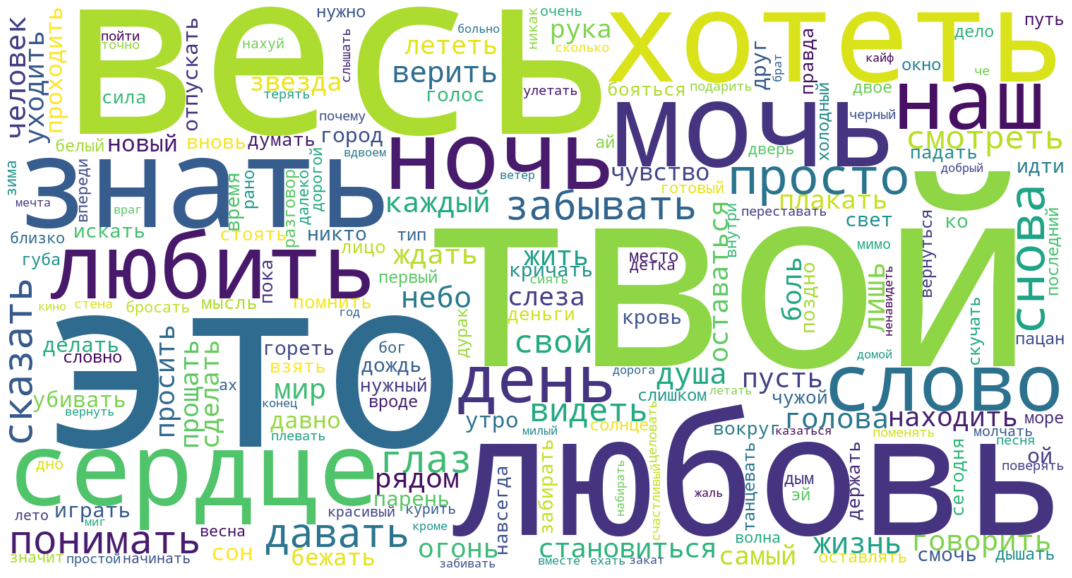

In [30]:
common = used_words
wc = WordCloud(width=1500, height=800, background_color="white",
               collocations=False, min_font_size=7).generate_from_frequencies(used_words)
plt.figure(figsize = (15,20))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()